# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Antonutti Adrien 31202100

Part. 2: Arnaud Batiste 89492100

Part. 3: Delsart Mathis 31302100

Part. 4: Lebrun Léa 42072100

Part. 5: Michaux Bastien 83982100

Part. 6: Remacle Louis 82162100

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


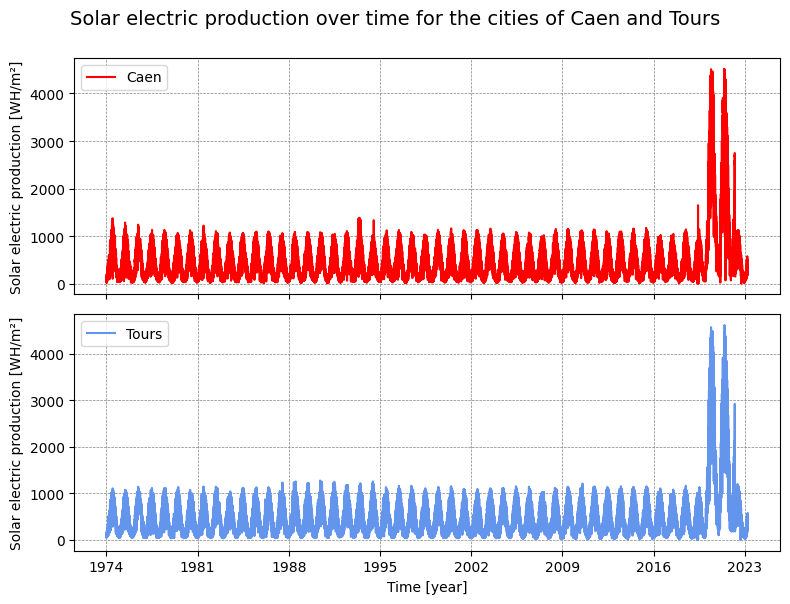

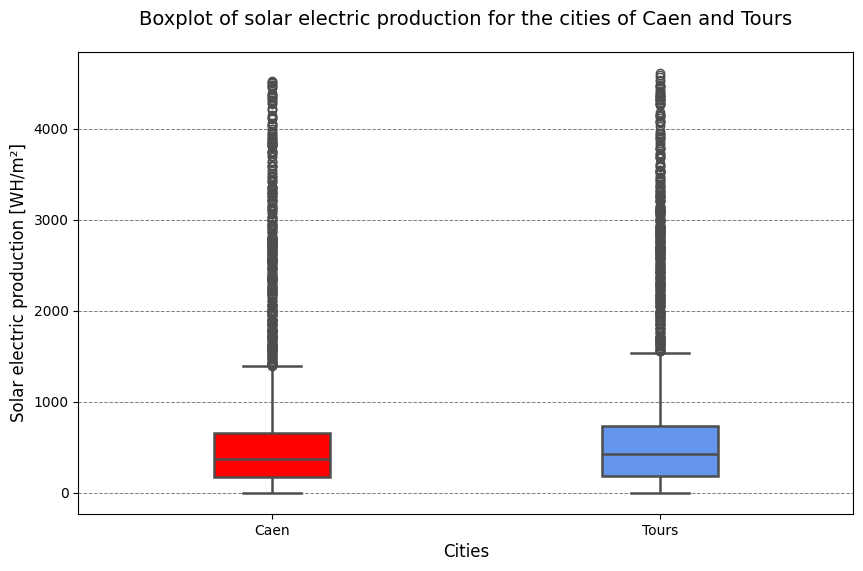

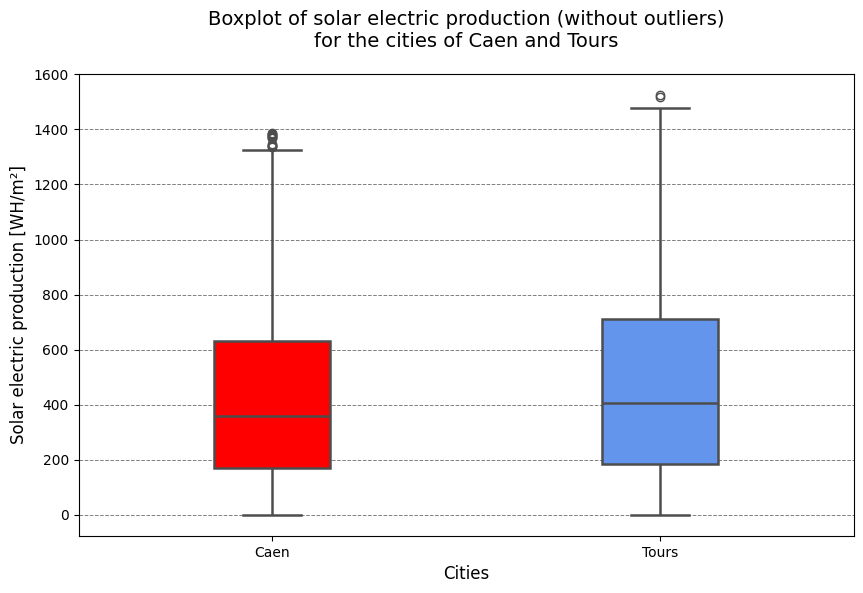

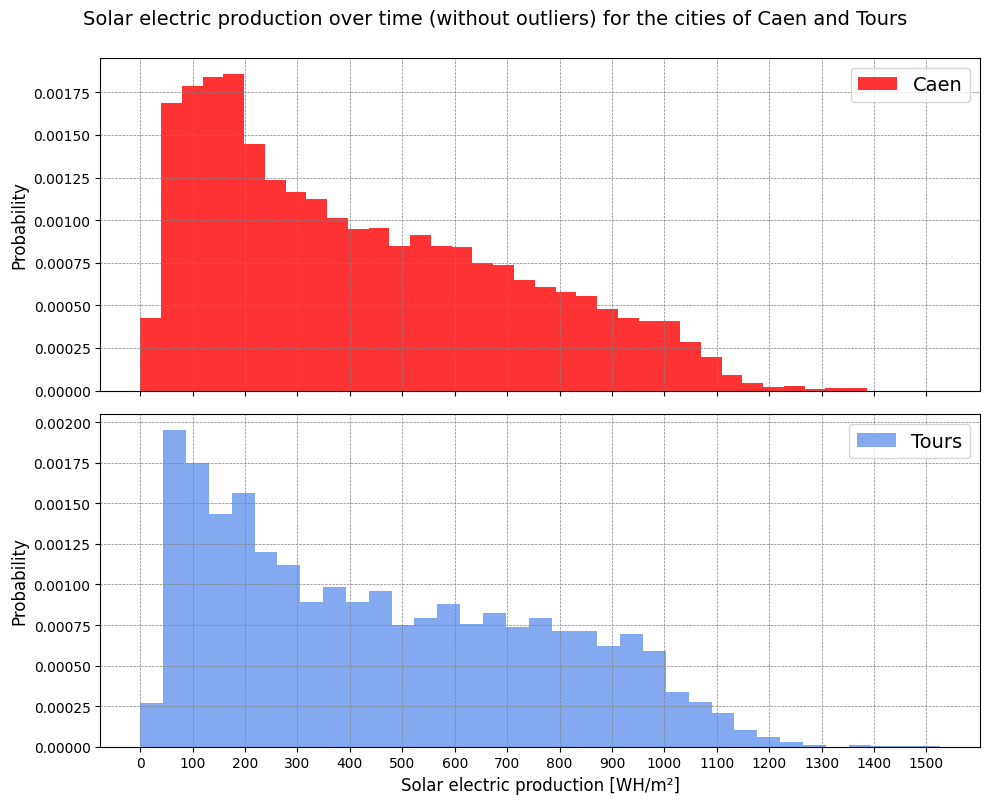

In [140]:
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from IPython.display import HTML
from scipy.stats import gamma, norm, f, t, wilcoxon, linregress
import numpy as np
import pandas as pd
import seaborn as sns

BLUE = '#6495ED'
RED = '#FF0000'

def plot_prod(df):

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

    ax1.plot(df['date_formated'], df['Caen'], color=RED, label='Caen')
    ax1.set_ylabel('Solar electric production [WH/m²]')
    ax1.legend()

    ax2.plot(df['date_formated'], df['Tours'], color=BLUE, label='Tours')
    ax2.set_xlabel('Time [year]')
    ax2.set_ylabel('Solar electric production [WH/m²]')
    ax2.legend()

    plt.suptitle("Solar electric production over time for the cities of Caen and Tours", fontsize=14, y=1)

    for ax in (ax1, ax2):
        ax.xaxis.set_major_locator(YearLocator(base=7))
        ax.xaxis.set_major_formatter(DateFormatter("%Y"))
        ax.grid('x', color='gray', linestyle='--', linewidth=0.5)
        ax.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


def plot_hist_prod(df):

    _, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    ax1.hist(df['Caen'], bins=35, density=True, alpha=0.8, color=RED, label='Caen')
    ax1.set_ylabel('Probability', fontsize=12)
    ax1.legend(fontsize=14)

    ax2.hist(df['Tours'], bins=35, density=True, alpha=0.8, color=BLUE, label='Tours')
    ax2.set_xlabel('Solar electric production [WH/m²]', fontsize=12)
    ax2.set_ylabel('Probability', fontsize=12)
    ax2.legend(fontsize=14)
    plt.xticks(np.arange(0, 1600, 100))

    for ax in (ax1, ax2):
        ax.grid('x', color='gray', linestyle='--', linewidth=0.5)

    plt.suptitle("Solar electric production over time (without outliers) for the cities of Caen and Tours", fontsize=14, y=1)

    plt.tight_layout()
    plt.show()


def plot_boxplot_daily_prod(df, outliers):

    plt.figure(figsize=(10, 6))

    boxplot = sns.boxplot(data=df[['Caen', 'Tours']], orient='v', palette=[RED, BLUE], width=0.3, linewidth=1.8, saturation=100)

    plt.xlabel('Cities', fontsize=12)
    title_axis = 'Solar electric production [WH/m²]' if outliers else 'Solar electric production (without outliers) [WH/m²]'
    plt.ylabel(title_axis, fontsize=12)
    plt.ylabel('Solar electric production [WH/m²]', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    title = 'Boxplot of solar electric production for the cities of Caen and Tours' if outliers else 'Boxplot of solar electric production (without outliers)\nfor the cities of Caen and Tours'
    boxplot.set_title(title, y=1.04, fontsize=14)

    plt.show()


def get_outliers_mask(data):

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (data >= lower_bound) & (data <= upper_bound)
    return mask


datas = pd.read_csv('Radiation.csv')

df = pd.DataFrame(datas)
df['date_formated'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['month'] = df['date_formated'].dt.month
df['year'] = df['date_formated'].dt.year
df.drop(['Unnamed: 0'], axis=1, inplace=True) # Remove useless column

P_cr = 0.18
f_perf = 0.75

df['Caen'] *= 24 * P_cr * f_perf
df['Tours'] *= 24 * P_cr * f_perf

plot_prod(df)
plot_boxplot_daily_prod(df, True)

# Remove the lines (from the dataframe) where there is at least one outlier (into 'Caen' column or 'Tours' column or both)
df = df[get_outliers_mask(df['Caen']) & get_outliers_mask(df['Tours'])]

plot_boxplot_daily_prod(df, False)
plot_hist_prod(df)


---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [141]:
def get_statistics_month(df_month, param_city):
    data = df_month[param_city]
    statistics_data = {
        'AVERAGE': data.mean(),
        'MEDIAN': data.median(),
        'STD': data.std(),
        '5% QUANTILE': data.quantile(0.05),
        '95% QUANTILE': data.quantile(0.95)
    }
    return statistics_data

means, medians, stds, low_quantile, high_quantile = [], [], [], [], []
for i in range(1, 13):
    df_month = df[(df['month'] == i)]
    means.append("{:.2f} | {:.2f}".format(df_month['Caen'].mean(), df_month['Tours'].mean()))
    medians.append("{:.2f} | {:.2f}".format(df_month['Caen'].median(), df_month['Tours'].median()))
    stds.append("{:.2f} | {:.2f}".format(df_month['Caen'].std(), df_month['Tours'].std()))
    low_quantile.append("{:.2f} | {:.2f}".format(df_month['Caen'].quantile(0.05), df_month['Tours'].quantile(0.05)))
    high_quantile.append("{:.2f} | {:.2f}".format(df_month['Caen'].quantile(0.95), df_month['Tours'].quantile(0.95)))

datas = {'       ': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December'],
         'Average': means, 'Median': medians, 'Std': stds, 'Quantile 5%': low_quantile, 'Quantile 95%': high_quantile}

df_stats = pd.DataFrame(datas)

print("Les données à gauche du caractère '|' correspondent à la ville de Caen et celles à droite à la ville de Tours.")
display(HTML(df_stats.to_html(index=False)))

Les données à gauche du caractère '|' correspondent à la ville de Caen et celles à droite à la ville de Tours.


,Average,Median,Std,Quantile 5%,Quantile 95%
January,146.88 | 158.13,123.12 | 123.12,113.16 | 134.68,42.12 | 45.36,304.56 | 332.42
February,250.50 | 273.32,223.56 | 236.52,169.34 | 194.88,70.79 | 71.28,466.56 | 525.37
March,377.94 | 417.67,359.64 | 414.72,186.51 | 197.88,126.36 | 136.08,654.48 | 714.58
April,560.37 | 600.15,573.48 | 622.08,210.45 | 225.92,204.12 | 205.74,874.80 | 926.64
May,677.08 | 705.47,703.08 | 735.48,255.10 | 251.91,233.28 | 246.73,1033.56 | 1049.76
June,737.11 | 792.47,751.68 | 826.20,266.36 | 246.93,291.60 | 343.44,1108.08 | 1127.52
July,725.44 | 790.50,738.72 | 829.44,241.36 | 225.56,317.52 | 366.12,1065.96 | 1095.12
August,623.10 | 699.66,638.28 | 727.38,198.02 | 200.42,282.69 | 328.05,913.68 | 975.24
September,459.98 | 514.46,466.56 | 531.36,168.79 | 185.04,181.93 | 191.65,709.56 | 774.36
October,282.71 | 313.05,268.92 | 301.32,154.38 | 172.01,88.61 | 95.09,492.48 | 544.32


---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)



Analyse de la log-vraisemblance pour la ville de Caen :
	Log-vraisemblance pour le modèle Gamma : -9635.88
	Log-vraisemblance pour le modèle Normal : -9549.39

Analyse de la log-vraisemblance pour la ville de Tours :
	Log-vraisemblance pour le modèle Gamma : -9737.80
	Log-vraisemblance pour le modèle Normal : -9649.52

Le modèle qui maximise la log-vraisemblance est le meilleur modèle.
On a par conséquent :
	La meilleure distribution pour la ville de Caen est la distribution Normal.
	La meilleure distribution pour la ville de Tours est la distribution Normal.

On est parti sur l'hypothèse que nos modèles (Gamma et Normal) sont appropriés aux données.
On doit donc le vérifier graphiquement.

Visuellement, la meilleure distribution pour les deux villes est bien la distribution Normal.
La distribution Normal est mieux centrée sur les données et les représente d'une meilleure manière par rapport à la distribution Gamma.



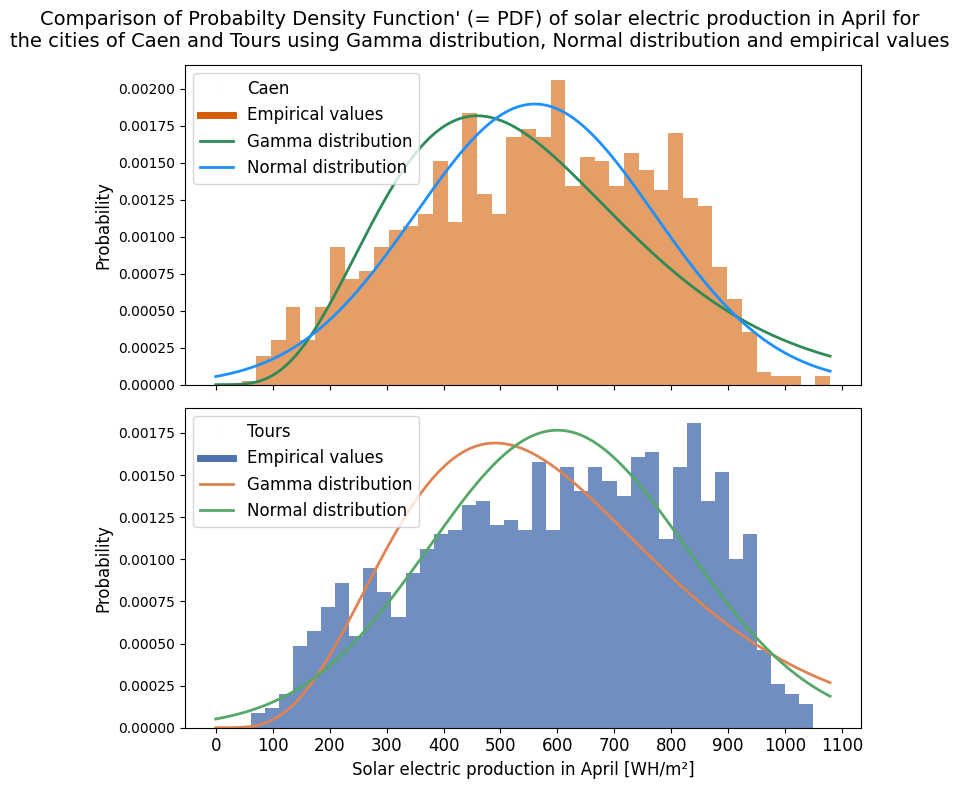

In [148]:
df_april = df[(df['month'] == 4)]

distrib_rv = {'Caen': {'gamma': None, 'norm': None},
              'Tours': {'gamma': None, 'norm': None}}

log_likelihood = {'Caen' : {}, 'Tours' : {}}

# The log-likehood maximization is done inside the fit method of the distribution (gamma or normal) to find the best parameters.
for city in ['Caen', 'Tours']:
    shape, loc, scale = gamma.fit(df_april[city], floc=-0.001)
    distrib_rv[city]['gamma'] = gamma(shape, loc, scale)

    loc, scale = norm.fit(df_april[city])
    distrib_rv[city]['norm'] = norm(loc, scale)

    log_likelihood[city]['gamma'] = np.sum(np.log(distrib_rv[city]['gamma'].pdf(df_april[city])))
    log_likelihood[city]['norm'] = np.sum(np.log(distrib_rv[city]['norm'].pdf(df_april[city])))

    print("\nAnalyse de la log-vraisemblance pour la ville de {} :".format(city))
    print("\tLog-vraisemblance pour le modèle Gamma : {:.2f}".format(log_likelihood[city]['gamma']))
    print("\tLog-vraisemblance pour le modèle Normal : {:.2f}".format(log_likelihood[city]['norm']))

best_models = {'Caen': 'Gamma' if log_likelihood['Caen']['gamma'] > log_likelihood['Caen']['norm'] else 'Normal',
               'Tours': 'Gamma' if log_likelihood['Tours']['gamma'] > log_likelihood['Tours']['norm'] else 'Normal'}

print("\nLe modèle qui maximise la log-vraisemblance est le meilleur modèle.\nOn a par conséquent :")         
print("\tLa meilleure distribution pour la ville de Caen est la distribution {}.".format(best_models['Caen']))
print("\tLa meilleure distribution pour la ville de Tours est la distribution {}.\n".format(best_models['Tours']))
print("On est parti sur l'hypothèse que nos modèles (Gamma et Normal) sont appropriés aux données.\nOn doit donc le vérifier graphiquement.\n")
print("Visuellement, la meilleure distribution pour les deux villes est bien la distribution Normal.")
print("La distribution Normal est mieux centrée sur les données et les représente d'une meilleure manière par rapport à la distribution Gamma.\n")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

x_values = np.linspace(0, max(max(df_april['Caen']), max(df_april['Tours'])), 1000)

ax1.hist(df_april['Caen'], bins=40, density=True, alpha=0.6, color='#D55E00')
ax1.plot(x_values, distrib_rv['Caen']['gamma'].pdf(x_values), color='#2E8B57', lw=2)
ax1.plot(x_values, distrib_rv['Caen']['norm'].pdf(x_values), color='#1E90FF', lw=2)
ax1.set_ylabel('Probability', fontsize=12)
custom_labels = [Line2D([0], [0], marker='o', color='w', label='Caen', markerfacecolor='g', markersize=1),
                 Line2D([0], [0], color='#D55E00', lw=5),
                 Line2D([0], [0], color='#2E8B57', lw=2),
                 Line2D([0], [0], color='#1E90FF', lw=2)]
ax1.legend(custom_labels,  ['Caen', 'Empirical values', 'Gamma distribution', 'Normal distribution'], fontsize=12, loc='upper left')

ax2.hist(df_april['Tours'], bins=40, density=True, alpha=0.8, color='#4C72B0', label='Empirique (Tours)')
ax2.plot(x_values, distrib_rv['Tours']['gamma'].pdf(x_values), color='#DD8452', lw=2, label='Gamma (Tours)')
ax2.plot(x_values, distrib_rv['Tours']['norm'].pdf(x_values), color='#55A868', lw=2, label='Normale (Tours)')
ax2.set_xlabel('Solar electric production in April [WH/m²]', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
plt.xticks(np.arange(0, 1200, 100), fontsize=12)
custom_labels = [Line2D([0], [0], marker='o', color='w', label='Ville de Tours', markerfacecolor='g', markersize=1),
                 Line2D([0], [0], color='#4C72B0', lw=5),
                 Line2D([0], [0], color='#DD8452', lw=2),
                 Line2D([0], [0], color='#55A868', lw=2)]
ax2.legend(custom_labels,  ['Tours', 'Empirical values', 'Gamma distribution', 'Normal distribution'], fontsize=12, loc='upper left')

plt.suptitle("Comparison of Probabilty Density Function' (= PDF) of solar electric production in April for\nthe cities of Caen and Tours using Gamma distribution, Normal distribution and empirical values", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

==== Décision à l'aide des quantiles ====
	t_obs = -4.84
	Quantile inférieur = -1.96
	Quantile supérieur = 1.96

	t_obs n'est pas compris entre les quantiles inférieur et supérieur, on rejette l'hypothèse H0.
	Les deux villes n'ont donc pas la même moyenne de production d'électricité solaire.

==== Décision à l'aide de la p-valeur (test bilatéral) ====
	p-valeur = 0.00%
	Erreur acceptée = 5.00%

	La p-valeur est inférieure à l'erreur acceptée, on rejette l'hypothèse H0.
	Les deux villes n'ont donc pas la même moyenne de production d'électricité solaire.

Voici un graphique représentant la distribution t-Student et les valeurs du test d'égalité des variances:


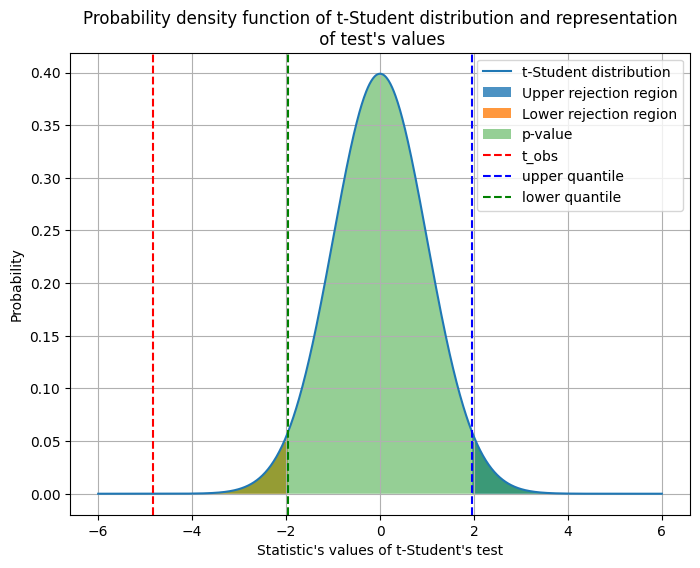

In [161]:
alpha = 0.05
n1 = len(df_april['Caen'])
n2 = len(df_april['Tours'])
df_distr = n1 + n2 - 2
delta_means = df_april['Caen'].mean() - df_april['Tours'].mean()
var_caen, var_tours = df_april['Caen'].var(), df_april['Tours'].var()
S_pool = np.sqrt(((n1 - 1) * var_caen + (n2 - 1) * var_tours) / df_distr)

# ≈ Student's T distribution => Correct because both of the population are normal (2.1)
t_obs = delta_means / (S_pool * np.sqrt(1/n1 + 1/n2)) # with the null hypothesis H0: μ1 = μ2

print("==== Décision à l'aide des quantiles ====")

high_quantile = t.ppf(1 - alpha/2, df=df_distr)
low_quantile = - high_quantile # symmetrical distribution

print("\tt_obs = {:.2f}".format(t_obs))
print("\tQuantile inférieur = {:.2f}".format(low_quantile))
print("\tQuantile supérieur = {:.2f}\n".format(high_quantile))

if low_quantile < t_obs < high_quantile:
    print("\tt_obs est compris entre les quantiles inférieur et supérieur, on ne peut pas rejeter l'hypothèse H0.")
    print("\tLes deux villes ont donc la même moyenne de production d'électricité solaire.\n")
else:
    print("\tt_obs n'est pas compris entre les quantiles inférieur et supérieur, on rejette l'hypothèse H0.")
    print("\tLes deux villes n'ont donc pas la même moyenne de production d'électricité solaire.\n")

print("==== Décision à l'aide de la p-valeur (test bilatéral) ====")

p_value = 2 * t.cdf(t_obs, df=df_distr) # * 2 because two-tailed test (symmetrical distribution)

print("\tp-valeur = {:.2f}%".format(100 * p_value))
print("\tErreur acceptée = {:.2f}%\n".format(100 * alpha))

if alpha < p_value:
    print("\tLa p-valeur est supérieure à l'erreur acceptée, on ne peut pas rejeter l'hypothèse H0.")
    print("\tLes deux villes ont donc la même moyenne de production d'électricité solaire.\n")
else:
    print("\tLa p-valeur est inférieure à l'erreur acceptée, on rejette l'hypothèse H0.")
    print("\tLes deux villes n'ont donc pas la même moyenne de production d'électricité solaire.\n")


print("Voici un graphique représentant la distribution t-Student et les valeurs du test d'égalité des variances:")

x_values = np.linspace(-6, 6, 1000)
pdf = t.pdf(x_values, df=df_distr)

plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf, label='t-Student distribution')
plt.fill_between(x_values, pdf, where=(x_values >= high_quantile), alpha=0.8, label='Upper rejection region')
plt.fill_between(x_values, pdf, where=(x_values <= low_quantile), alpha=0.8, label='Lower rejection region')
plt.fill_between(x_values, pdf, where=(x_values >= t_obs), alpha=0.5, label='p-value')
plt.axvline(t_obs, color='red', linestyle='--', label='t_obs')
plt.axvline(high_quantile, color='blue', linestyle='--', label='upper quantile')
plt.axvline(low_quantile, color='green', linestyle='--', label='lower quantile')
plt.xlabel('Statistic\'s values of t-Student\'s test')
plt.ylabel('Probability')
plt.title('Probability density function of t-Student distribution and representation\n of test\'s values')
plt.legend()
plt.grid()
plt.show()

---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


==== Décision à l'aide des quantiles ====
	f_obs = 0.87
	Quantile supérieur = 1.09

	La statistique de test est inférieure au quantile supérieur, on ne peut pas rejeter l'hypothèse H0.
	Les variances des deux villes sont donc égales.

==== Décision à l'aide de la p-valeur (test unilatéral à droite) ====
	p-valeur = 99.61%
	Erreur acceptée = 5.00%

	La p-valeur est supérieure à l'erreur acceptée, on ne peut pas rejeter l'hypothèse H0.
	Les variances des deux villes sont donc égales.

Voici un graphique représentant la distribution F et les valeurs du test d'égalité des variances :


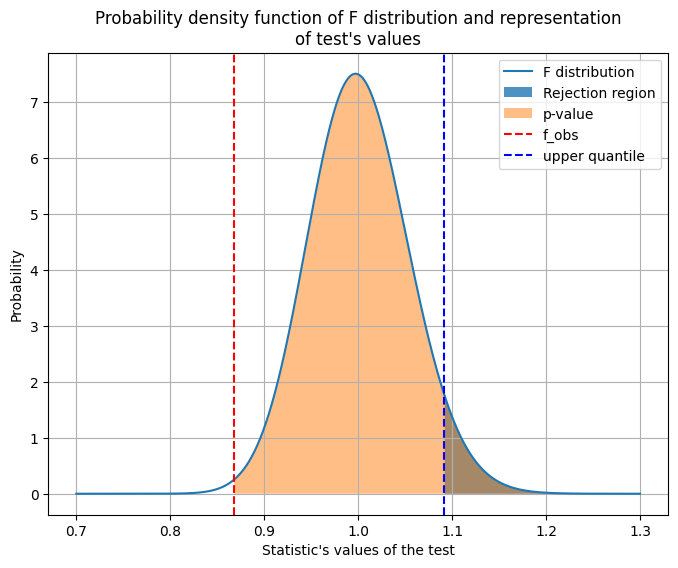

In [164]:
# ≈ Distribution Fisher-Snedecor => Correct because both of the population are normal (2.1)
f_obs = var_caen / var_tours
df1_distr = n1 - 1
df2_distr = n2 - 1

print("==== Décision à l'aide des quantiles ====")

high_quantile = f.ppf(1-alpha, df1_distr, df2_distr)

print("\tf_obs = {:.2f}".format(f_obs))
print("\tQuantile supérieur = {:.2f}\n".format(high_quantile))

if f_obs < high_quantile:
    print("\tLa statistique de test est inférieure au quantile supérieur, on ne peut pas rejeter l'hypothèse H0.")
    print("\tLes variances des deux villes sont donc égales.\n")
else:
    print("\tLa statistique de test est supérieure au quantile, on rejette l'hypothèse H0.")
    print("\tLes variances des deux villes ne sont donc pas égales.\n")


print("==== Décision à l'aide de la p-valeur (test unilatéral à droite) ====")

p_value = 1 - f.cdf(f_obs, df1_distr, df2_distr)

print("\tp-valeur = {:.2f}%".format(100 * p_value))
print("\tErreur acceptée = {:.2f}%\n".format(100 * alpha))

if p_value > alpha:
    print("\tLa p-valeur est supérieure à l'erreur acceptée, on ne peut pas rejeter l'hypothèse H0.")
    print("\tLes variances des deux villes sont donc égales.\n")
else:
    print("\tLa p-valeur est inférieure à l'erreur acceptée, on rejette l'hypothèse H0.")
    print("\tLes variances des deux villes ne sont donc pas égales.\n")

print("Voici un graphique représentant la distribution F et les valeurs du test d'égalité des variances :")

x_values = np.linspace(0.7, 1.3, 1000)
pdf = f.pdf(x_values, df1_distr, df2_distr)

plt.figure(figsize=(8, 6))
plt.plot(x_values, pdf, label='F distribution')
plt.fill_between(x_values, pdf, where=(x_values >= high_quantile), alpha=0.8, label='Rejection region')
plt.fill_between(x_values, pdf, where=(x_values >= f_obs), alpha=0.5, label='p-value')
plt.axvline(f_obs, color='red', linestyle='--', label='f_obs')
plt.axvline(high_quantile, color='blue', linestyle='--', label='upper quantile')
plt.xlabel('Statistic\'s values of the test')
plt.ylabel('Probability')
plt.title('Probability density function of F distribution and representation\nof test\'s values')
plt.legend()
plt.grid()
plt.show()

---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

C'est un test statistique non paramétrique (= aucune hypothèse sur la distribution des données) qui permet de déterminer si deux échantillons liés ont des valeurs médianes significativement différentes.
Ce test est souvent utilisé lorsque les données ne suivent pas une distribution normale ou lorsque les données sont dans l'ordre.

L'avantage de ce test:
    - Pas d'hypothèse sur la distribution des données => Contrairement au test t-student qui suppose que les données sont distribuées selon une loi normale
    - Données dans l'ordre => C'est le cas ici avec les dates
    - Utile pour des échantillons liés => La production journalière d'énergie de la ville de Caen et de Tours est liés
    - Robuste aux données trop extrèmes (= outliers)

Utile dans notre projet pour toutes ces raisons.

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


Voici un graphique représentant les distributions des échantillons appariés pour les villes de Caen et Tours.
On peut voir que les médianes sont différentes.
Nous allons le prouver par la suite avec le test de Wilcoxon.


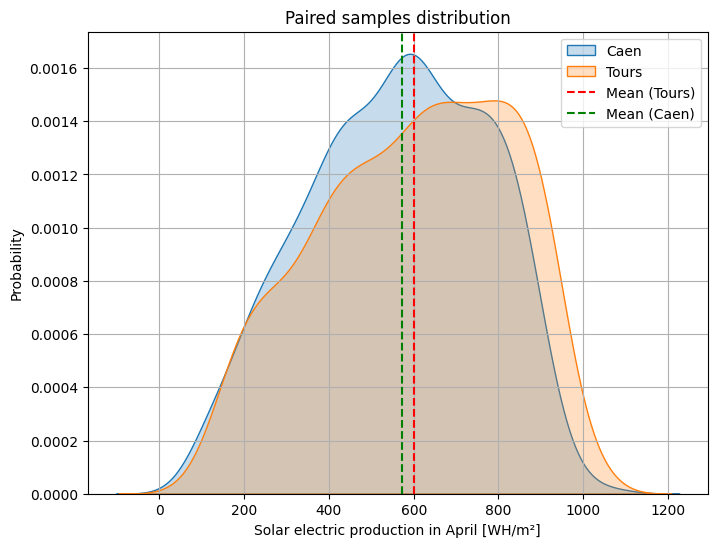

=== Test de Wilcoxon ===
	Statistique de test : 350770.00
	Erreur acceptée : 5.00%
	p-valeur : 0.00%

La p-valeur est inférieure à l'erreur acceptée, on rejette l'hypothèse H0.
Les échantillons sont statistiquement différents.
On en déduit que les moyennes des deux villes sont différentes si les échantillons sont statistiquement différents.



In [166]:
print("Voici un graphique représentant les distributions des échantillons appariés pour les villes de Caen et Tours.\nOn peut voir que les médianes sont différentes.\nNous allons le prouver par la suite avec le test de Wilcoxon.")

plt.figure(figsize=(8, 6))
sns.kdeplot(df_april['Caen'], label='Caen', fill=True)
sns.kdeplot(df_april['Tours'], label='Tours', fill=True)
plt.axvline(df_april['Tours'].mean(), color='red', linestyle='--', label='Mean (Tours)')
plt.axvline(df_april['Caen'].median(), color='green', linestyle='--', label='Mean (Caen)')
plt.xlabel('Solar electric production in April [WH/m²]')
plt.ylabel('Probability')
plt.title('Paired samples distribution')
plt.legend()
plt.grid()
plt.show()

print("=== Test de Wilcoxon ===")

stats, p_value = wilcoxon(df_april['Caen'], df_april['Tours'])

print("\tStatistique de test : {:.2f}".format(stats))
print("\tErreur acceptée : {:.2f}%".format(100 * alpha))
print("\tp-valeur : {:.2f}%\n".format(100 * p_value))

if p_value < alpha:
    print("La p-valeur est inférieure à l'erreur acceptée, on rejette l'hypothèse H0.\nLes échantillons sont statistiquement différents.")
    print("On en déduit que les moyennes des deux villes sont différentes si les échantillons sont statistiquement différents.\n")
else:
    print("La p-valeur est supérieure à l'erreur acceptée, on ne rejette pas l'hypothèse H0.\nLes échantillons sont statistiquement égaux.")
    print("On en déduit que les moyennes des deux villes sont les mêmes si les échantillons sont statistiquement égaux.\n")

---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


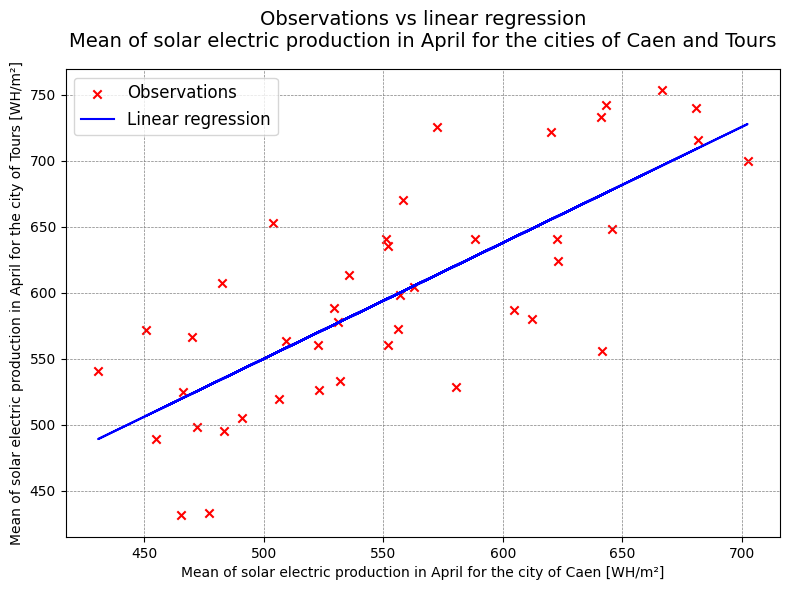

In [169]:
# Keep only the data between the year 1977 and 2019 included
df_datas = df_april[(1977 <= df_april['year']) & (df_april['year'] <= 2019)]

list_average_Caen, list_average_Tours = [], []
for i in range(1977, 2020):
    list_average_Caen.append(df_datas[(df_datas['year'] == i)]['Caen'].mean())
    list_average_Tours.append(df_datas[(df_datas['year'] == i)]['Tours'].mean())

caen_means, tours_means = np.array(list_average_Caen), np.array(list_average_Tours)

slope, intercept, r_value, p_value, std_err = linregress(caen_means, tours_means)
y_line = slope * caen_means + intercept

fig = plt.figure(figsize=(8, 6))

plt.scatter(caen_means, tours_means, marker='x', color='red', label='Observations')
plt.plot(caen_means, y_line, color='blue', label='Linear regression')
plt.xlabel('Mean of solar electric production in April for the city of Caen [WH/m²]')
plt.ylabel('Mean of solar electric production in April for the city of Tours [WH/m²]')
plt.title("Observations vs linear regression\nMean of solar electric production in April for the cities of Caen and Tours", fontsize=14, y=1.03)
plt.legend(fontsize=12, loc='upper left')
plt.grid('x', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [205]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# TODO

---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

In [ ]:
# TODO